In [2]:
from sklearn.datasets import load_iris

In [10]:
iris = load_iris()

In [12]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [37]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [38]:
sy = pd.Series(iris.target, dtype = 'category')
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


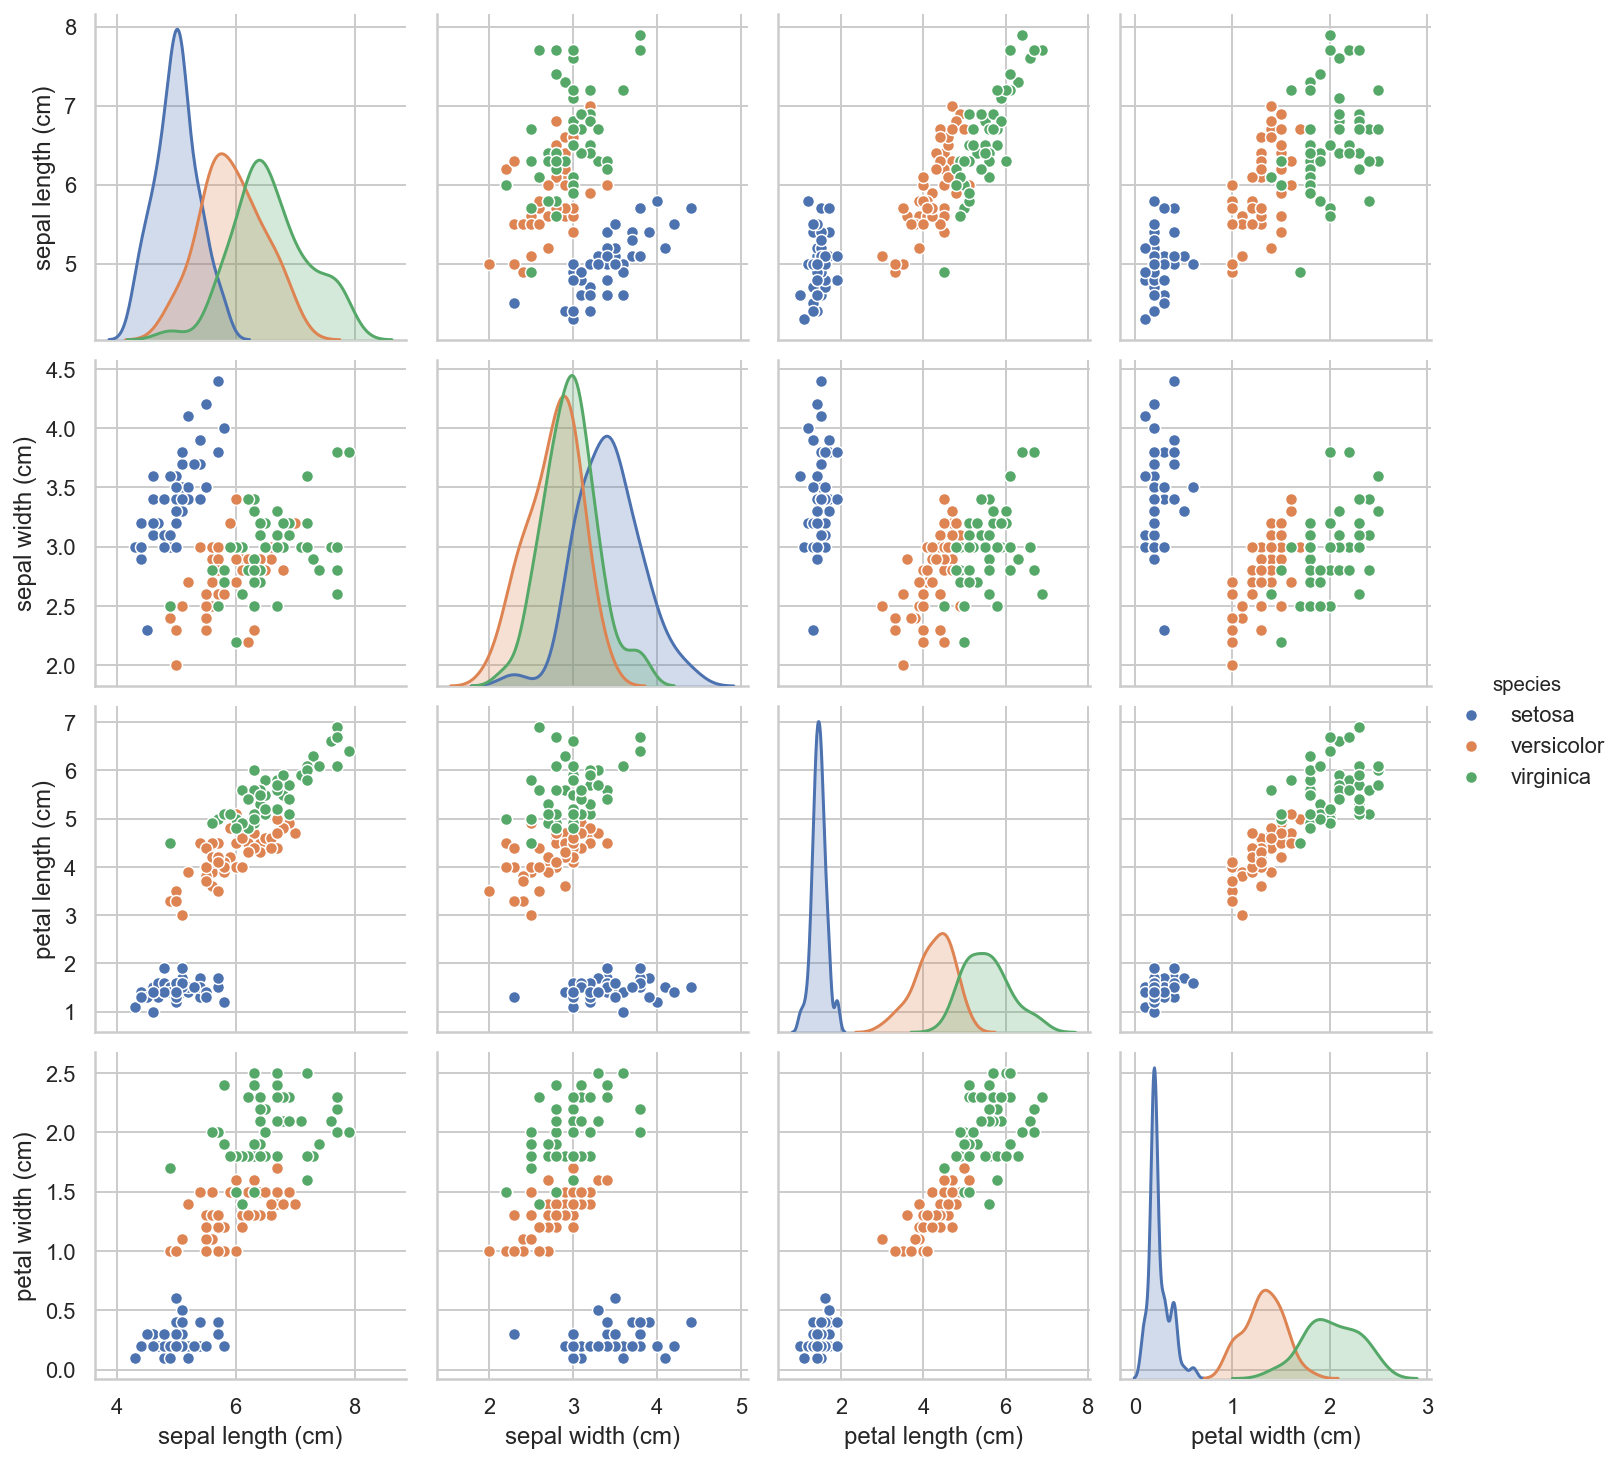

In [39]:
sns.pairplot(df, hue = 'species')
plt.show()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Classification = Binary Classification 

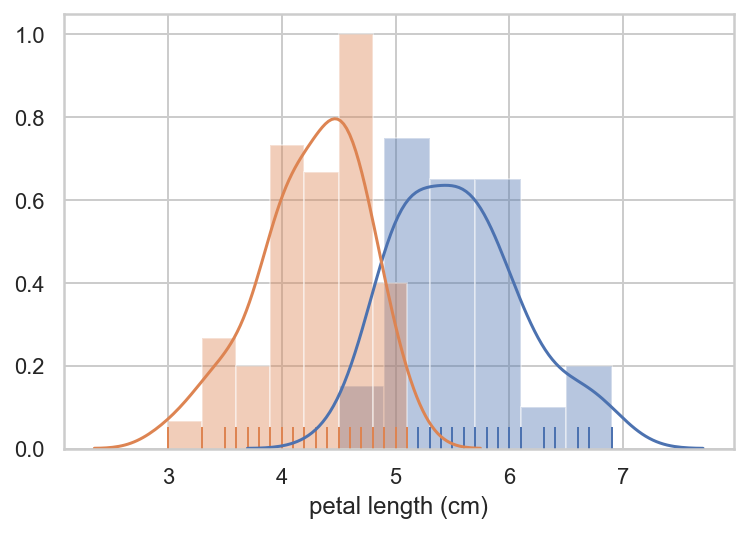

In [40]:
sns.distplot(df[df.species == 'virginica']['petal length (cm)'], hist=True, rug=True)
sns.distplot(df[df.species == 'versicolor']['petal length (cm)'], hist=True, rug=True)
plt.show()

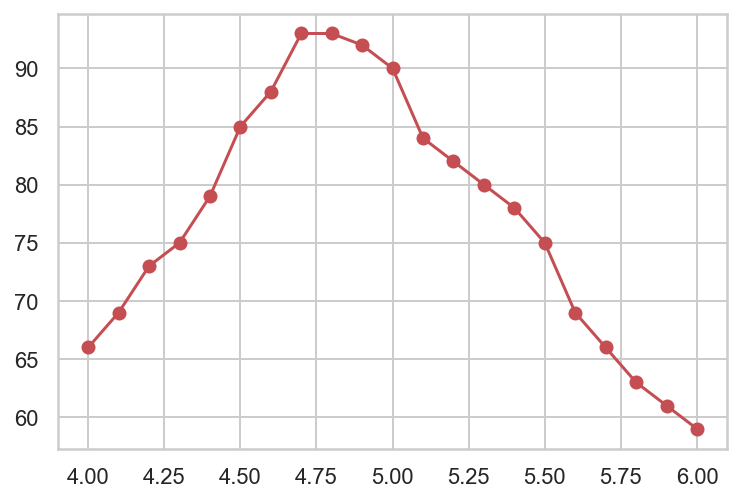

In [60]:
df['species2'] = df['species'] == 'versicolor'

def accuracy(threshold):
    df['predict'] = df["petal length (cm)"] <= threshold
    return (df.predict == df.species2).sum()

thresholds = np.linspace(4, 6, 21)
list_accuracy = []
for t in thresholds:
    list_accuracy.append(accuracy(t))
    
plt.plot(thresholds, list_accuracy, "ro-")